## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

You can use gdown modules to import dataset for the assignment.

For importing any file from drive to Colab you can write the syntax as `!gdown --id file_id`.

You can run the below cell to import the required preprocessed data.csv file and glove vector.

```python
!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-   # preprocessed_data.csv
!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_   # glove_vectors
```

## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

```py
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)
```

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

In [1]:
import os
import re
import pickle
import shutil

import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.sparse import hstack

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import pad_sequences
# from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.show()

In [2]:
!nvidia-smi

Mon Aug  1 11:40:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A10G         On   | 00000000:00:1E.0 Off |                    0 |
|  0%   26C    P8     9W / 300W |      0MiB / 22731MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Read the csv file

df = pd.read_csv('preprocessed_data.csv')
print(f'Shape : {df.shape}')
df.head(2)

Shape : (109248, 9)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


<div class="alert alert-info" role="alert">
Since <code>preprocessed_data.csv</code> does not contain the <strong>quantity</strong> coulumn, we have to rergenerate the preprocessed data once agin.
</div>

In [4]:
train_df = pd.read_csv('train_data.csv')
print(f'Shape : {train_df.shape}')
train_df.head(2)

Shape : (109248, 17)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [5]:
resources = pd.read_csv('resources.csv')
print(f'Shape : {resources.shape}')
resources.head(2)

Shape : (1541272, 4)


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [6]:
quantity_price = resources.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
quantity_price.head(3)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [7]:
df_project = pd.merge(train_df, quantity_price, on='id', how='left')
print(f'Shape : {df_project.shape}')
df_project.head(3)

Shape : (109248, 19)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,516.85,22


### Preprocessing Categorical Features

We need to remove the spaces, and special characters
* Remove additional spaces
* Remove dots : '.'
* Replace '-' with '_'
* Replace ' The ' with ''
* Replace '&' with '_'
* Replace ',' with '_'
* Convert all the characters to small case

In [8]:
# project_grade_category

df_project['project_grade_category'] = df_project['project_grade_category'].str.replace(' ','_')
df_project['project_grade_category'] = df_project['project_grade_category'].str.replace('-','_')
df_project['project_grade_category'] = df_project['project_grade_category'].str.lower()
df_project['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

In [9]:
# project_subject_categories

df_project['clean_categories'] = df_project['project_subject_categories'].str.replace(' The ','')
df_project['clean_categories'] = df_project['clean_categories'].str.replace(' ','')
df_project['clean_categories'] = df_project['clean_categories'].str.replace('&','_')
df_project['clean_categories'] = df_project['clean_categories'].str.replace(',','_')
df_project['clean_categories'] = df_project['clean_categories'].str.lower()
df_project['clean_categories'].value_counts()

literacy_language                       23655
math_science                            17072
literacy_language_math_science          14636
health_sports                           10177
music_arts                               5180
specialneeds                             4226
literacy_language_specialneeds           3961
appliedlearning                          3771
math_science_literacy_language           2289
appliedlearning_literacy_language        2191
history_civics                           1851
math_science_specialneeds                1840
literacy_language_music_arts             1757
math_science_music_arts                  1642
appliedlearning_specialneeds             1467
history_civics_literacy_language         1421
health_sports_specialneeds               1391
warmth_care_hunger                       1309
math_science_appliedlearning             1220
appliedlearning_math_science             1052
literacy_language_history_civics          809
health_sports_literacy_language   

In [10]:
# teacher_prefix

df_project['teacher_prefix'].fillna('Mrs.', inplace = True)
df_project['teacher_prefix'] = df_project['teacher_prefix'].str.replace('.', '', regex = True)
df_project['teacher_prefix'] = df_project['teacher_prefix'].str.lower()
df_project['teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

In [11]:
# project_subject_subcategories

df_project['clean_subcategories'] = df_project['project_subject_subcategories'].str.replace(' The ','')
df_project['clean_subcategories'] = df_project['clean_subcategories'].str.replace(' ','')
df_project['clean_subcategories'] = df_project['clean_subcategories'].str.replace('&','_')
df_project['clean_subcategories'] = df_project['clean_subcategories'].str.replace(',','_')
df_project['clean_subcategories'] = df_project['clean_subcategories'].str.lower()
df_project['clean_subcategories'].value_counts()

literacy                                 9486
literacy_mathematics                     8325
literature_writing_mathematics           5923
literacy_literature_writing              5571
mathematics                              5379
                                         ... 
communityservice_financialliteracy          1
communityservice_music                      1
literature_writing_nutritioneducation       1
gym_fitness_warmth_care_hunger              1
history_geography_warmth_care_hunger        1
Name: clean_subcategories, Length: 401, dtype: int64

In [12]:
# school_state

df_project['school_state'] = df_project['school_state'].str.lower()
df_project['school_state'].unique()

array(['in', 'fl', 'az', 'ky', 'tx', 'ct', 'ga', 'sc', 'nc', 'ca', 'ny',
       'ok', 'ma', 'nv', 'oh', 'pa', 'al', 'la', 'va', 'ar', 'wa', 'wv',
       'id', 'tn', 'ms', 'co', 'ut', 'il', 'mi', 'hi', 'ia', 'ri', 'nj',
       'mo', 'de', 'mn', 'me', 'wy', 'nd', 'or', 'ak', 'md', 'wi', 'sd',
       'ne', 'nm', 'dc', 'ks', 'mt', 'nh', 'vt'], dtype=object)

In [13]:
# https://gist.github.com/sebleier/554280

stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
             "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
             "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
             "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
             "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
             "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
             "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
             "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
             "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
             "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
             "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
             "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [14]:
# https://stackoverflow.com/a/47091490/4084039

def decontracted(phrase):
    
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

In [15]:
# https://gist.github.com/sebleier/554280
# Combining all the above stundents
def preprocess_text(text_data):
    
    preprocessed_text = []
    
    for sentance in tqdm(text_data):

        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)

        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        
        preprocessed_text.append(sent.lower().strip())
        
    return preprocessed_text

In [16]:
df_project['essay'] = df_project['project_essay_1'].map(str) + \
                      df_project['project_essay_2'].map(str) + \
                      df_project['project_essay_3'].map(str) + \
                      df_project['project_essay_4'].map(str)

df_project['processed_essay'] = preprocess_text(df_project['essay'].values)

100%|██████████| 109248/109248 [00:48<00:00, 2259.67it/s]


In [17]:
print('9 : BEFORE Processing')
print('=' * 21)
print(df_project['essay'].values[9])
print('\nAFTER Processing')
print('=' *16)
print(df_project['processed_essay'].values[9])

9 : BEFORE Processing
Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my students 

In [18]:
df_project['clean_project_resource_summary'] = preprocess_text(df_project['project_resource_summary'].values)

100%|██████████| 109248/109248 [00:04<00:00, 21921.30it/s]


In [19]:
print('9 : BEFORE Processing')
print('=' * 21)
print(df_project['project_resource_summary'].values[9])
print('\nAFTER Processing')
print('=' *16)
print(df_project['clean_project_resource_summary'].values[9])

9 : BEFORE Processing
My students need great books to use during Independent Reading, Read Alouds, Partner Reading and Author Studies.

AFTER Processing
students need great books use independent reading read alouds partner reading author studies


In [20]:
def contains_numerical(data):

    if re.findall(r'\d', data):
        return 1
    
    return 0

df_project['resource_summary_contain_numerical'] = df_project['clean_project_resource_summary']. \
                                                                    apply(contains_numerical)

In [21]:
preprocessed_columns = ['school_state', 'teacher_prefix', 'project_grade_category',
                        'clean_categories', 'clean_subcategories', 'processed_essay',
                        'teacher_number_of_previously_posted_projects', 'price', 'quantity',
                        'resource_summary_contain_numerical', 'project_is_approved']

final_df = df_project[preprocessed_columns]
print(f'Shape : {final_df.shape}')
final_df.head(2)

Shape : (109248, 11)


,school_state,teacher_prefix,project_grade_category,clean_categories,clean_subcategories,processed_essay,teacher_number_of_previously_posted_projects,price,quantity,resource_summary_contain_numerical,project_is_approved
0,in,mrs,grades_prek_2,literacy_language,esl_literacy,students english learners working english seco...,0,154.6,23,0,0
1,fl,mr,grades_6_8,history_civics_health_sports,civics_government_teamsports,students arrive school eager learn polite gene...,7,299.0,1,0,1


In [22]:
# Creating required directories

if os.path.exists('Processed_Data') and os.path.isdir('Model_Plots'):
    shutil.rmtree('Processed_Data')
    shutil.rmtree('Model_Plots')
    
os.mkdir('Processed_Data')
os.mkdir('Model_Plots')

if os.path.exists('modelCheck'):
    shutil.rmtree('modelCheck')
    
if os.path.isdir('logs'):
    shutil.rmtree('logs')

In [23]:
final_df.to_csv('Processed_Data/final_df.csv', index = False)

In [24]:
final_df = pd.read_csv('Processed_Data/final_df.csv')

In [25]:
Y = final_df['project_is_approved']
X = final_df.drop('project_is_approved', axis = 1)

print(f'Shape X : {X.shape}\nShape Y : {Y.shape}')

Shape X : (109248, 10)
Shape Y : (109248,)


In [26]:
# perform stratified train test split on the dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    stratify = Y, random_state = 40)

In [27]:
print(f'x_train shape : {x_train.shape}')
print(f'y_train shape : {y_train.shape}\n')
print(f'x_test shape  : {x_test.shape}')
print(f'y_test shape  : {y_test.shape}')

x_train shape : (76473, 10)
y_train shape : (76473,)

x_test shape  : (32775, 10)
y_test shape  : (32775,)


## 1.1 Text Vectorization

Since the data is already preprocessed, we can directly move to vectorization part

First we will vectorize the text data

For vectorization of text data in deep learning we use tokenizer, you can go through below references

https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html

https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do

After text vectorization you should get train_padded_docs and test_padded_docs


After getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word we will be storing this data in form of an embedding matrix and will use it while defining our model.

Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [28]:
with open('glove_vectors', 'rb') as f:
    glove = pickle.load(f)

In [29]:
%%time

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

token = Tokenizer()

token.fit_on_texts(x_train['processed_essay'])

essay_train = token.texts_to_sequences(x_train['processed_essay'])
essay_test = token.texts_to_sequences(x_test['processed_essay'])

essay_train_padded = pad_sequences(essay_train, maxlen = 300)
essay_test_padded = pad_sequences(essay_test, maxlen = 300)

word_index = token.word_index

CPU times: user 13.6 s, sys: 66.8 ms, total: 13.7 s
Wall time: 13.7 s


In [30]:
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, 300))
embedding_matrix.shape

(49000, 300)

In [31]:
# https://www.kaggle.com/code/shahules/basic-eda-cleaning-and-glove
# https://www.kaggle.com/code/shahules/basic-eda-cleaning-and-glove?scriptVersionId=26011146&cellId=72

for word, count in tqdm(word_index.items()):
    if glove.get(word) is not None:
        embedding_matrix[count] = glove.get(word)

len(embedding_matrix)

100%|██████████| 48999/48999 [00:00<00:00, 428457.93it/s]


49000

## 1.2 Categorical feature Vectorization

For model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.

You can either use tokenizer,label encoder or ordinal encoder to perform the task

Label encoder gives an error for 'unseen values' (values present in test but not in train)

Handle unseen values with label encoder - https://stackoverflow.com/a/56876351

Ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter

Documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

After categorical feature vectorization you will have column_train_data and column_test_data.

In [32]:
%%time
max_length = 1

token = Tokenizer()
token.fit_on_texts(x_train['school_state'])
school_state_train = token.texts_to_sequences(x_train['school_state'])
school_state_test = token.texts_to_sequences(x_test['school_state'])
school_state_train_padded = pad_sequences(school_state_train, maxlen = max_length)
school_state_test_padded = pad_sequences(school_state_test, maxlen = max_length)

school_state_lab = len(token.word_index) + 1

token = Tokenizer()
token.fit_on_texts(x_train['teacher_prefix'])
teacher_prefix_train = token.texts_to_sequences(x_train['teacher_prefix'])
teacher_prefix_test = token.texts_to_sequences(x_test['teacher_prefix'])
teacher_prefix_train_padded = pad_sequences(teacher_prefix_train, maxlen = max_length)
teacher_prefix_test_padded = pad_sequences(teacher_prefix_test, maxlen = max_length)

teacher_prefix_lab = len(token.word_index) + 1

token = Tokenizer()
token.fit_on_texts(x_train['project_grade_category'])
project_grade_category_train = token.texts_to_sequences(x_train['project_grade_category'])
project_grade_category_test = token.texts_to_sequences(x_test['project_grade_category'])
project_grade_category_train_padded = pad_sequences(project_grade_category_train, maxlen = max_length)
project_grade_category_test_padded = pad_sequences(project_grade_category_test, maxlen = max_length)

project_grade_category_lab = len(token.word_index) + 1

token = Tokenizer()
token.fit_on_texts(x_train['clean_categories'])
clean_categories_train = token.texts_to_sequences(x_train['clean_categories'])
clean_categories_test = token.texts_to_sequences(x_test['clean_categories'])
clean_categories_train_padded = pad_sequences(clean_categories_train, maxlen = max_length)
clean_categories_test_padded = pad_sequences(clean_categories_test, maxlen = max_length)

clean_categories_lab = len(token.word_index) + 1

token = Tokenizer()
token.fit_on_texts(x_train['clean_subcategories'])
clean_subcategories_train = token.texts_to_sequences(x_train['clean_subcategories'])
clean_subcategories_test = token.texts_to_sequences(x_test['clean_subcategories'])
clean_subcategories_train_padded = pad_sequences(clean_subcategories_train, maxlen = max_length)
clean_subcategories_test_padded = pad_sequences(clean_subcategories_test, maxlen = max_length)

clean_subcategories_lab = len(token.word_index) + 1

CPU times: user 8.13 s, sys: 23.3 ms, total: 8.15 s
Wall time: 8.15 s


## 1.3 Numerical feature Vectorization

You have to standardise the numerical columns

Stack both the numerical features

After numerical feature vectorization you will have numerical_data_train and numerical_data_test

In [33]:
min_max = MinMaxScaler()
x_train['price'] = min_max.fit_transform(x_train[['price']])
x_test['price'] = min_max.transform(x_test[['price']])

min_max = MinMaxScaler()
x_train['quantity'] = min_max.fit_transform(x_train[['quantity']])
x_test['quantity'] = min_max.transform(x_test[['quantity']])

nums_colums  = ['price', 'quantity', 'resource_summary_contain_numerical']
x_train_nums = x_train[nums_colums]
x_test_nums = x_test[nums_colums]

## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

As of now we have vectorized all our features now we will define our model.

As it is clear from above image that the given model has multiple input layers and hence we have to use functional API

Please go through - https://keras.io/guides/functional_api/

It is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.

While defining your model make sure that you use variable names while defining any length,dimension or size.

for ex.- you should write the code as `input_text = Input(shape=(pad_length,))` and not as `input_text = Input(shape=(300,))`

the embedding layer for text data should be non trainable

the embedding layer for categorical data should be trainable

https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0

`print model.summary()` after you have defined the model

plot the model using `utils.plot_model` module and make sure that it is similar to the above image

In [34]:
# https://keras.io/api/layers/recurrent_layers/lstm/

tensorflow.keras.backend.clear_session()
tensorflow.random.set_seed(42)
OUT_DIM = 6

seq_input = Input(shape = (300,), name = 'Input_Text_Data')
embed_sqe_input = Embedding(input_dim = num_words, output_dim = 300, weights = [embedding_matrix],
                           trainable = False, name = 'Embed_Text_Data')(seq_input)
lstm_ = LSTM(128, activation = 'relu', return_sequences = True, name = 'LSTM')(embed_sqe_input)
flatten_seq = Flatten(name = 'Flat_LSTM')(lstm_)

school_input = Input(shape = (1,), name = 'School_State')
embed_school_input = Embedding(input_dim = school_state_lab, output_dim = OUT_DIM,
                            name = 'Embed_School_State')(school_input)
flatten_school = Flatten(name = 'Flat_School')(embed_school_input)

teacher_input = Input(shape = (1,), name = 'Teacher_Prefix')
embed_teacher_input = Embedding(input_dim = teacher_prefix_lab, output_dim = OUT_DIM,
                            name = 'Embed_Teacher_Prefix', trainable = True)(teacher_input)
flatten_teacher = Flatten(name = 'Flat_Teacher_Prefix')(embed_teacher_input)

grade_input = Input(shape = (1,), name = 'Project_Grade_Categ.')
embed_grade_input = Embedding(input_dim = project_grade_category_lab, output_dim =OUT_DIM,
                            name = 'Embed_Project_Grade_Categ.', trainable = True)(grade_input)
flatten_grade = Flatten(name = 'Flat_Project_Grade_Categ.')(embed_grade_input)

cat_input = Input(shape = (1,), name = 'Clean_Categ.')
embed_cat_input = Embedding(input_dim = clean_categories_lab, output_dim = OUT_DIM,
                            name = 'Embed_Clean_Categ.')(cat_input)
flatten_cat = Flatten(name = 'Flat_Clean_Categ.')(embed_cat_input)

clean_cat_input = Input(shape = (1,), name = 'Clean_Subcateg.')
embed_clean_cat_input = Embedding(input_dim = clean_subcategories_lab, output_dim = OUT_DIM,
                            name = 'Embed_Clean_Subcateg.', trainable = True)(clean_cat_input)
flatten_clean_cat = Flatten(name = 'Flat_Clean_Subcateg.')(embed_clean_cat_input)


numerical_input = Input(shape = (3,), name = 'Remaining_Numericals__Price_Quantity_ResourceSummmary')
dense_numerical = Dense(128, activation = 'relu' , kernel_initializer = 'he_normal',
                       name = 'Numericals__Price_Quantity_ResourceSummmary', trainable = True)(numerical_input)

concat_list = [flatten_seq, flatten_school, flatten_teacher, flatten_grade,
               flatten_cat, flatten_clean_cat, dense_numerical]
inp_list = [seq_input, school_input, teacher_input, grade_input, cat_input,
            clean_cat_input, numerical_input]

concat_1 = Concatenate(name = 'Concatenate')(concat_list)
dense_1 = Dense(256, activation = 'relu', name = 'Dense_Layer1_After_Concat.')(concat_1)

dropout_1 = Dropout(0.5, name = 'Dropout-1')(dense_1)
dense_2 = Dense(256, activation = 'relu', name = 'Dense_Layer2_After_Concat')(dropout_1)

dropout_2 = Dropout(0.5, name = 'Dropout-2')(dense_2)
dense_3 = Dense(8, activation = 'relu', name = 'Dense_Layer3_After_Concat')(dropout_2)

out_put_softmax = Dense(2, activation = 'sigmoid', name = 'Output_layer_to_classify_with_softmax')(dense_3)

model_1 = Model(inputs = inp_list, outputs = out_put_softmax, name = 'Model_1')

model_1.summary()

Model: "Model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Text_Data (InputLayer)   [(None, 300)]        0           []                               
                                                                                                  
 Embed_Text_Data (Embedding)    (None, 300, 300)     14700000    ['Input_Text_Data[0][0]']        
                                                                                                  
 School_State (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 Teacher_Prefix (InputLayer)    [(None, 1)]          0           []                               
                                                                                            

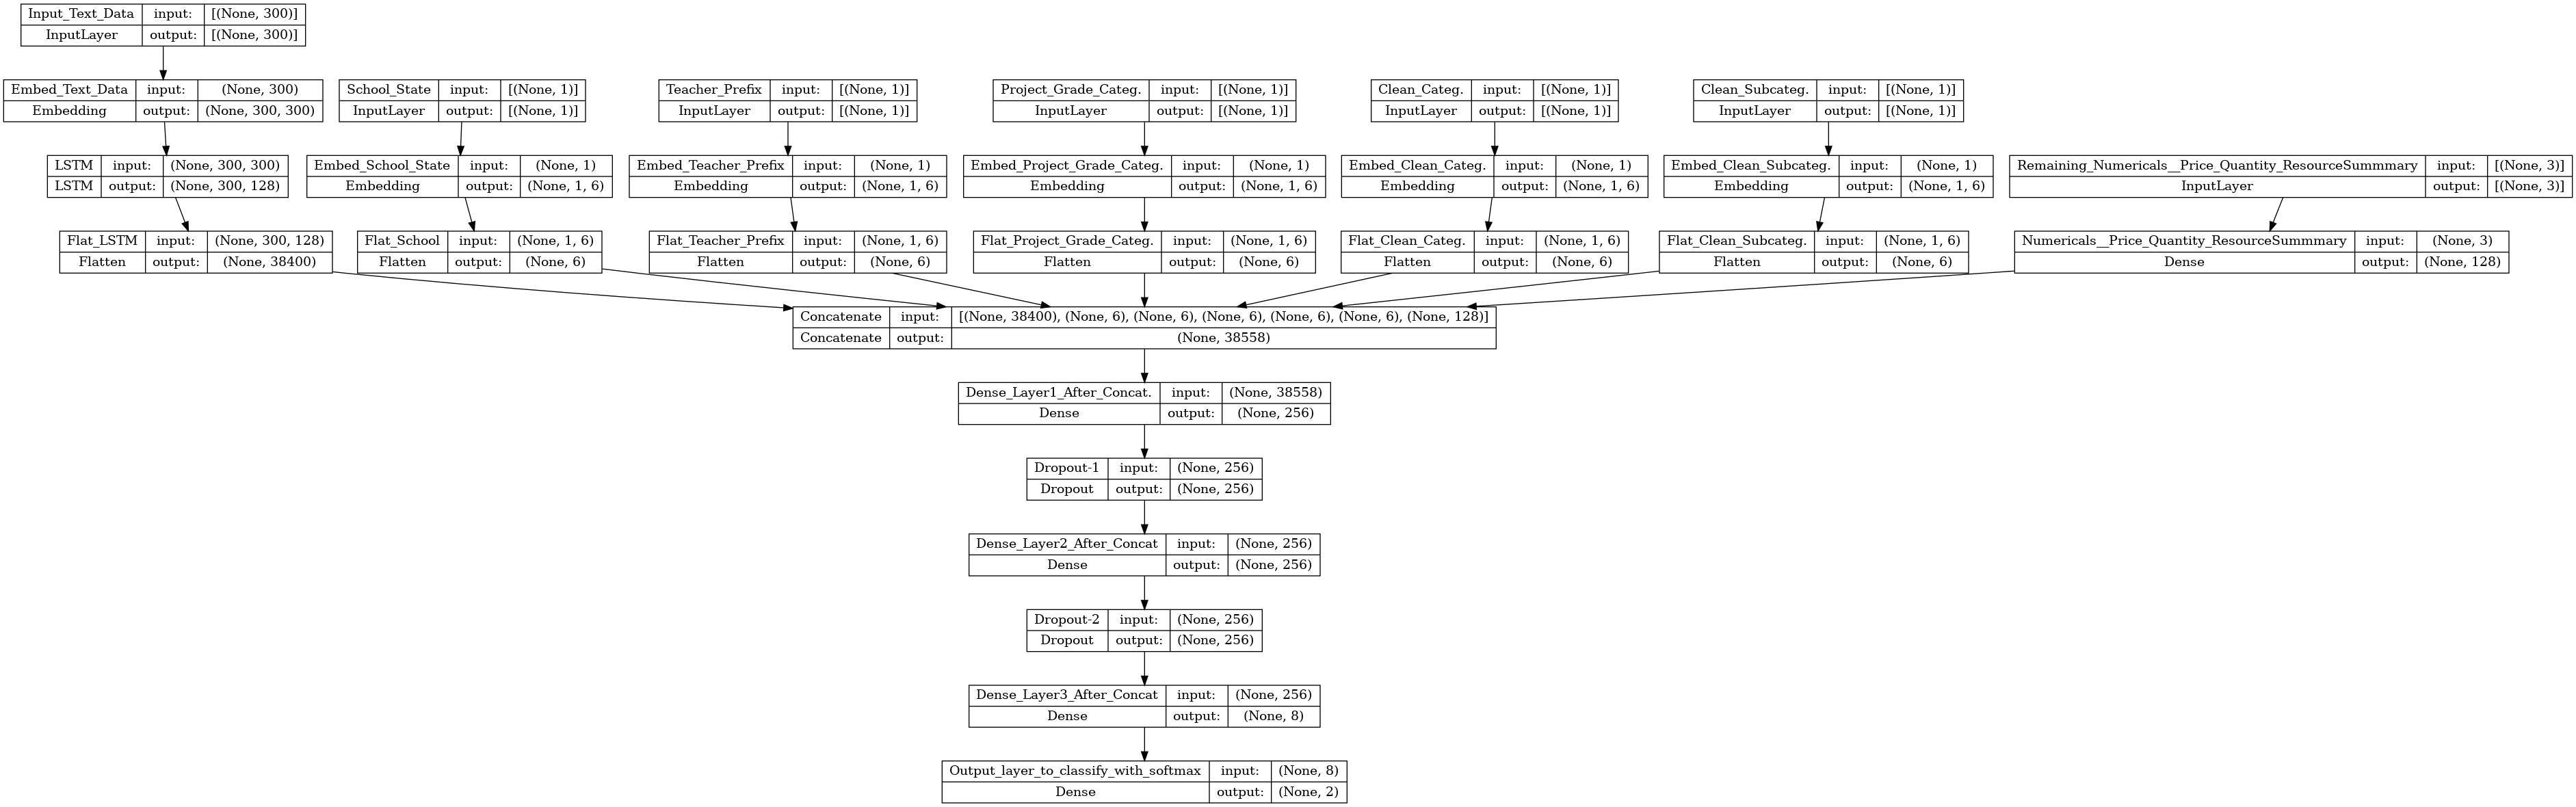

In [35]:
plot_model(model_1, to_file = 'Model_Plots/model_1.png', show_shapes = True)

In [36]:
# https://keras.io/api/callbacks/reduce_lr_on_plateau/
# https://keras.io/api/callbacks/early_stopping/
# https://keras.io/api/callbacks/tensorboard/
# https://keras.io/api/callbacks/model_checkpoint/

logdir = 'logs/model_1/' + datetime.now().strftime('%Y%m%d_%H%M%S')
tensorBoard = TensorBoard(log_dir = logdir, histogram_freq = 1)

filepath = 'modelCheck/model_1/epo_{epoch:02d}-accu_{val_auc:.4f}.hdf5'
model_checkP = ModelCheckpoint(filepath, monitor = 'val_auc', verbose = 1, save_best_only = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_auc', factor = 0.9, patience = 2, verbose = 1)

early_stop = EarlyStopping(monitor = 'val_auc', patience = 2, verbose = 1)

CallBacks = [tensorBoard, model_checkP, reduce_lr, early_stop]

## 1.5 Compiling and fititng your model

Define custom auc as metric , do not use tf.keras.metrics

https://stackoverflow.com/a/46844409 - custom AUC reference 1

https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2

Compile and fit your model

In [37]:
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [38]:
train_list = [essay_train_padded, school_state_train_padded, teacher_prefix_train_padded,
              project_grade_category_train_padded,
              clean_categories_train_padded, clean_subcategories_train_padded, x_train_nums]

test_list = [essay_test_padded, school_state_test_padded, teacher_prefix_test_padded,
             project_grade_category_test_padded,
            clean_categories_test_padded, clean_subcategories_test_padded, x_test_nums]

In [39]:
# https://stackoverflow.com/a/69248506
def roc_score_(y_true, y_pred):
    return roc_auc_score(y_true, y_pred, average = 'micro')

def auc(y_true, y_pred):
    return tf.py_function(roc_score_, (y_true, y_pred), tf.double)

In [40]:
# https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class
# https://keras.io/api/optimizers/adam/
    
optim = Adam(learning_rate = 0.001)
model_1.compile(optimizer = optim, metrics = [auc], loss = 'categorical_crossentropy')

In [41]:
EPOCHS_1 = 5

Model1 = model_1.fit(train_list, y_train_cat, epochs = EPOCHS_1, batch_size = 128, verbose = 1,
            validation_data = (test_list, y_test_cat), callbacks = CallBacks)

Epoch 1/5
598/598 [==============================] - ETA: 0s - loss: 0.3945 - auc: 0.8988
Epoch 1: val_auc improved from inf to 0.90947, saving model to modelCheck/model_1/epo_01-accu_0.9095.hdf5
598/598 [==============================] - 240s 397ms/step - loss: 0.3945 - auc: 0.8988 - val_loss: 0.3838 - val_auc: 0.9095 - lr: 0.0010
Epoch 2/5
598/598 [==============================] - ETA: 0s - loss: 0.3864 - auc: 0.9143
Epoch 2: val_auc improved from 0.90947 to 0.90893, saving model to modelCheck/model_1/epo_02-accu_0.9089.hdf5
598/598 [==============================] - 238s 397ms/step - loss: 0.3864 - auc: 0.9143 - val_loss: 0.3766 - val_auc: 0.9089 - lr: 0.0010
Epoch 3/5
598/598 [==============================] - ETA: 0s - loss: 0.3422 - auc: 0.9254
Epoch 3: val_auc improved from 0.90893 to 0.90585, saving model to modelCheck/model_1/epo_03-accu_0.9058.hdf5
598/598 [==============================] - 237s 397ms/step - loss: 0.3422 - auc: 0.9254 - val_loss: 0.3773 - val_auc: 0.9058 - l

In [42]:
model_1_auc = round(Model1.history['auc'][-1], 3)
model_1_val_acc = round(Model1.history['val_auc'][-1], 3)
model_1_loss = round(Model1.history['val_loss'][-1], 3)

print(f"AUC score of the Model-1\t\t: {model_1_auc}")
print(f"Validation accuracy of the Model-1\t: {model_1_val_acc}")
print(f"Validation loss of the Model-1\t\t: {model_1_loss}")

AUC score of the Model-1		: 0.925
Validation accuracy of the Model-1	: 0.906
Validation loss of the Model-1		: 0.377


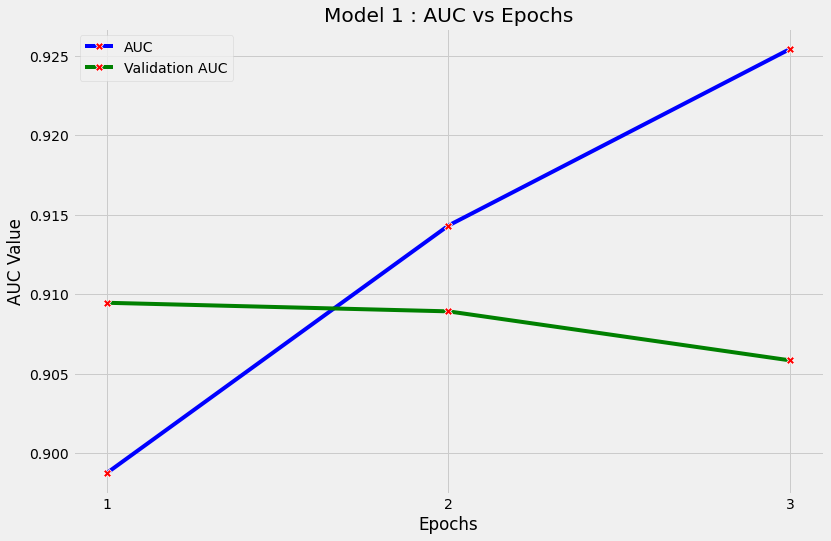

In [43]:
# https://wellsr.com/python/seaborn-line-plot-data-visualization/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html

epochs_ = list(range(1, len(Model1.history['auc']) + 1))
plt.figure(figsize = (12, 8))

sns.lineplot(y = 'auc', data = Model1.history , x = epochs_, label = 'AUC', color = 'b',
            marker = 'X', mfc = 'red', ms = 8)

sns.lineplot(y = 'val_auc', data = Model1.history , x = epochs_, label = 'Validation AUC',
            color = 'g', marker = 'X', mfc = 'red', ms = 8)

plt.title('Model 1 : AUC vs Epochs')
plt.xticks(epochs_) ; plt.xlabel('Epochs') ; plt.ylabel('AUC Value') ; plt.show()

In [44]:
model_1.save('Processed_Data/model_1.h5')

# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

In [45]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# https://stackoverflow.com/a/23796566

vect = TfidfVectorizer()
tfidf = vect.fit_transform(x_train['processed_essay'])

words_ = vect.get_feature_names_out()
idf_values_ = vect.idf_

In [46]:
for i in range(0, 101, 10):
    print(f'{i:3} percentile value is {round(np.percentile(idf_values_ , i), 3):7}')

  0 percentile value is   1.008
 10 percentile value is   7.541
 20 percentile value is   8.987
 30 percentile value is   9.942
 40 percentile value is  10.635
 50 percentile value is  11.146
 60 percentile value is  11.146
 70 percentile value is  11.552
 80 percentile value is  11.552
 90 percentile value is  11.552
100 percentile value is  11.552


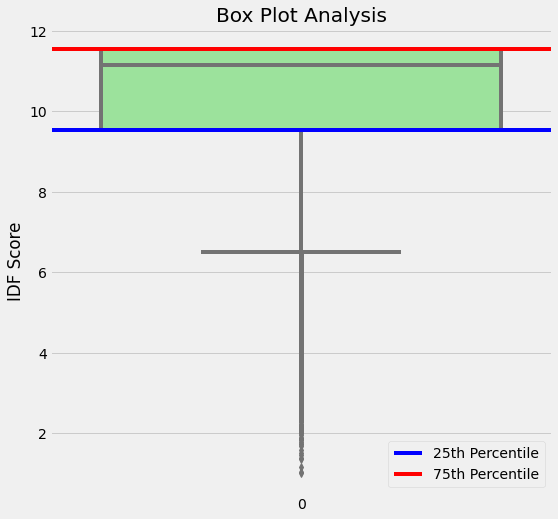

TF-IDF scores at 25th percentile :  9.537
TF-IDF scores at 75th percentile : 11.552


In [47]:
plt.figure(figsize=(8,8))
sns.boxplot(data = idf_values_, orient = 'v', color = 'lightgreen')
plt.title('Box Plot Analysis')
plt.axhline(round(np.percentile(idf_values_ , 25), 3), color = 'b', label = '25th Percentile')
plt.axhline(round(np.percentile(idf_values_ , 75), 3), color = 'r', label = '75th Percentile')
plt.legend(loc = 4)
plt.ylabel('IDF Score')
plt.show()

twnty5 = round(np.percentile(idf_values_ , 25), 3)
sventy5 = round(np.percentile(idf_values_ , 75), 3)

print(f'TF-IDF scores at 25th percentile : \u001b[34;1m{twnty5:6}\u001b[0m')
print(f'TF-IDF scores at 75th percentile : \u001b[31;1m{sventy5:6}')

<div class="alert alert-info" role="alert">
<ul>
    <li>Hint - A preferable IDF range is 2-11 for model 2. </li>
    <li>Since most of the values lie in <strong>11</strong> range, we are choosing <code>idf</code> values inbetween <strong>25th</strong> and <strong>75th</strong> percentile</li>

</ul>
</div>

In [48]:
idf_sorted_words = []

for w, idf in zip(words_, idf_values_):
    if idf >= twnty5 and sventy5 >= idf:
        idf_sorted_words.append(w)
        
print(len(idf_sorted_words))

36460


In [49]:
def idf_processing(data, idf_words):
    
    idf_pro = []
    for row in tqdm(data):
        senten = []
        for word in row.split():
            if word in idf_words:
                senten.append(word)
        idf_pro.append(' '.join(senten))
        
    return idf_pro
    
x_train_idf_words = idf_processing(x_train['processed_essay'], set(idf_sorted_words))
x_test_idf_words = idf_processing(x_test['processed_essay'], set(idf_sorted_words))

100%|██████████| 32775/32775 [00:00<00:00, 64338.34it/s]


In [50]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
MAXLN = 800

token = Tokenizer()

token.fit_on_texts(x_train_idf_words)

idf_essay_train = token.texts_to_sequences(x_train_idf_words)
idf_essay_test = token.texts_to_sequences(x_test_idf_words)

idf_essay_train_padded = pad_sequences(idf_essay_train, maxlen = MAXLN)
idf_essay_test_padded = pad_sequences(idf_essay_test, maxlen = MAXLN)

word_index = token.word_index

In [51]:
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, 300))
embedding_matrix.shape

(36461, 300)

In [52]:
# https://www.kaggle.com/code/shahules/basic-eda-cleaning-and-glove

for word, count in tqdm(word_index.items()):
    if glove.get(word) is not None:
        embedding_matrix[count] = glove.get(word)

embedding_matrix.shape

100%|██████████| 36460/36460 [00:00<00:00, 433629.81it/s]


(36461, 300)

In [53]:
tensorflow.keras.backend.clear_session()
tensorflow.random.set_seed(56)

idf_seq_input = Input(shape = (800,), name = 'Input_Text_Data')
idf_embed_sqe_input = Embedding(input_dim = num_words, output_dim = 300, weights = [embedding_matrix],
                           trainable = False, name = 'IDF_Embed_Text_Data')(idf_seq_input)
idf_lstm_ = LSTM(128, activation = 'relu', return_sequences = True, name = 'LSTM')(idf_embed_sqe_input)
idf_flatten_seq = Flatten(name = 'Flat_LSTM')(idf_lstm_)


concat_list = [idf_flatten_seq, flatten_school, flatten_teacher, flatten_grade,
                    flatten_cat, flatten_clean_cat, dense_numerical]

inp_list = [idf_seq_input, school_input, teacher_input, grade_input, cat_input,
                    clean_cat_input, numerical_input]

concat_1 = Concatenate(name = 'Concatenate')(concat_list)
dense_1 = Dense(256, activation = 'relu', name = 'IDF_Dense_Layer1_After_Concat.')(concat_1)

dropout_1 = Dropout(0.5, name = 'Dropout-1')(dense_1)
dense_2 = Dense(256, activation = 'relu', name = 'IDF_Dense_Layer2_After_Concat')(dropout_1)

dropout_2 = Dropout(0.5, name = 'Dropout-2')(dense_2)
dense_3 = Dense(8, activation = 'relu', name = 'IDF_Dense_Layer3_After_Concat')(dropout_2)

out_put_softmax = Dense(2, activation = 'softmax', name = 'IDF_Output_layer_to_classify_with_softmax')(dense_3)

model_2 = Model(inputs = inp_list, outputs = out_put_softmax, name = 'Model_2')

model_2.summary()

Model: "Model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Text_Data (InputLayer)   [(None, 800)]        0           []                               
                                                                                                  
 IDF_Embed_Text_Data (Embedding  (None, 800, 300)    10938300    ['Input_Text_Data[0][0]']        
 )                                                                                                
                                                                                                  
 School_State (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 Teacher_Prefix (InputLayer)    [(None, 1)]          0           []                         

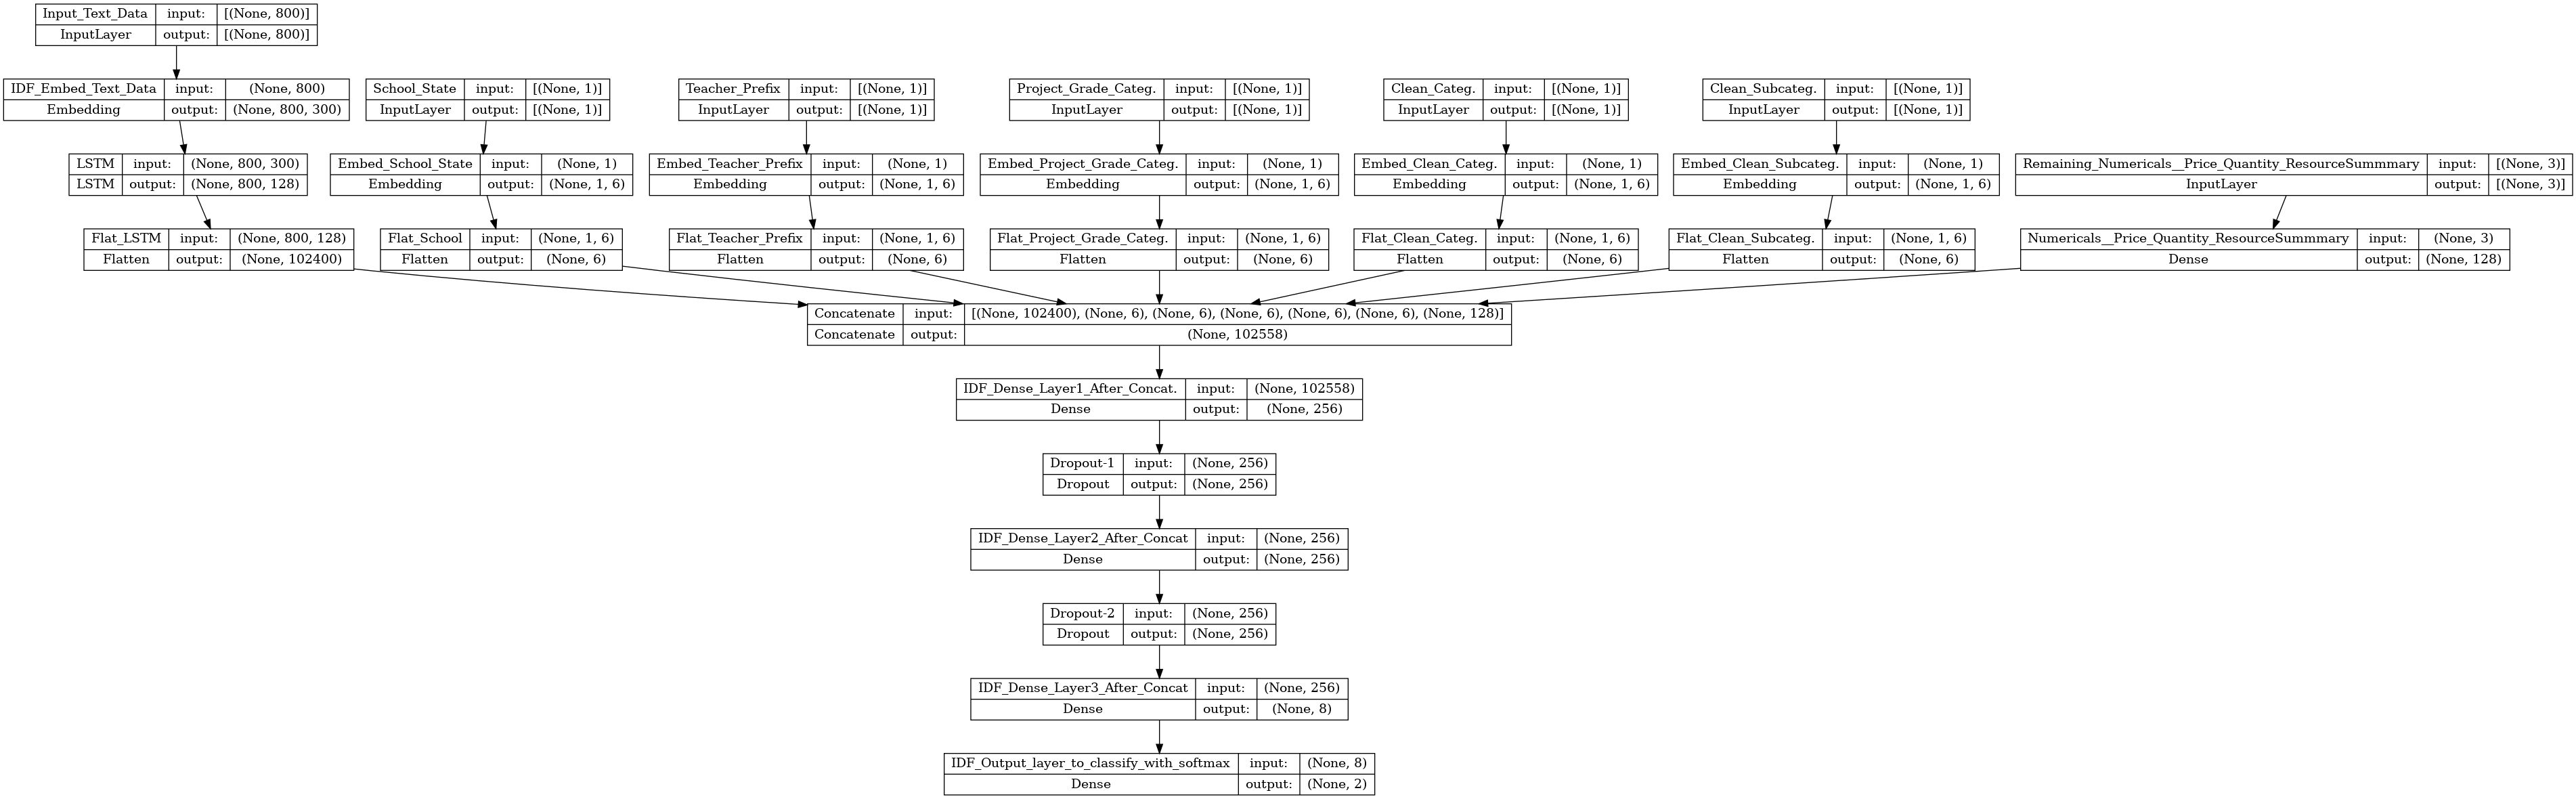

In [54]:
plot_model(model_2, to_file = 'Model_Plots/model_2.png', show_shapes = True)

In [55]:
# https://keras.io/api/callbacks/reduce_lr_on_plateau/
# https://keras.io/api/callbacks/early_stopping/
# https://keras.io/api/callbacks/tensorboard/
# https://keras.io/api/callbacks/model_checkpoint/

logdir = 'logs/model_2/' + datetime.now().strftime('%Y%m%d_%H%M%S')
tensorBoard = TensorBoard(log_dir = logdir, histogram_freq = 1)

filepath = 'modelCheck/model_2/epo_{epoch:02d}-accu_{val_auc:.4f}.hdf5'
model_checkP = ModelCheckpoint(filepath, monitor = 'val_auc', verbose = 1, save_best_only = True)

CallBacks = [tensorBoard, model_checkP, reduce_lr, early_stop]

In [56]:
train_list = [idf_essay_train_padded, school_state_train_padded, teacher_prefix_train_padded,
              project_grade_category_train_padded,
              clean_categories_train_padded, clean_subcategories_train_padded, x_train_nums]

test_list = [idf_essay_test_padded, school_state_test_padded, teacher_prefix_test_padded,
             project_grade_category_test_padded,
            clean_categories_test_padded, clean_subcategories_test_padded, x_test_nums]

In [57]:
# https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class
# https://keras.io/api/optimizers/adam/
    
optim = Adam(learning_rate = 0.001)
model_2.compile(optimizer = optim, metrics = [auc], loss = 'categorical_crossentropy')

In [58]:
EPOCHS_2 = 4

Model2 = model_2.fit(train_list, y_train_cat, epochs = EPOCHS_2, batch_size = 128, verbose = 1,
            validation_data = (test_list, y_test_cat), callbacks = CallBacks)

Epoch 1/4
598/598 [==============================] - ETA: 0s - loss: 0.4243 - auc: 0.8708
Epoch 1: val_auc improved from inf to 0.88282, saving model to modelCheck/model_2/epo_01-accu_0.8828.hdf5
598/598 [==============================] - 619s 1s/step - loss: 0.4243 - auc: 0.8708 - val_loss: 0.4106 - val_auc: 0.8828 - lr: 0.0010
Epoch 2/4
598/598 [==============================] - ETA: 0s - loss: 0.4066 - auc: 0.8884
Epoch 2: val_auc did not improve from 0.88282
598/598 [==============================] - 617s 1s/step - loss: 0.4066 - auc: 0.8884 - val_loss: 0.4103 - val_auc: 0.8856 - lr: 0.0010
Epoch 3/4
598/598 [==============================] - ETA: 0s - loss: 0.3885 - auc: 0.9024
Epoch 3: val_auc improved from 0.88282 to 0.88274, saving model to modelCheck/model_2/epo_03-accu_0.8827.hdf5

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.
598/598 [==============================] - 616s 1s/step - loss: 0.3885 - auc: 0.9024 - val_loss: 0.4184 - val_auc: 0.8827

In [59]:
model_2_auc = round(Model2.history['auc'][-1], 3)
model_2_val_acc = round(Model2.history['val_auc'][-1], 3)
model_2_loss = round(Model2.history['val_loss'][-1], 3)

print(f"AUC score of the Model-2\t\t: {model_2_auc}")
print(f"Validation accuracy of the Model-2\t: {model_2_val_acc}")
print(f"Validation loss of the Model-2\t\t: {model_2_loss}")

AUC score of the Model-2		: 0.918
Validation accuracy of the Model-2	: 0.877
Validation loss of the Model-2		: 0.447


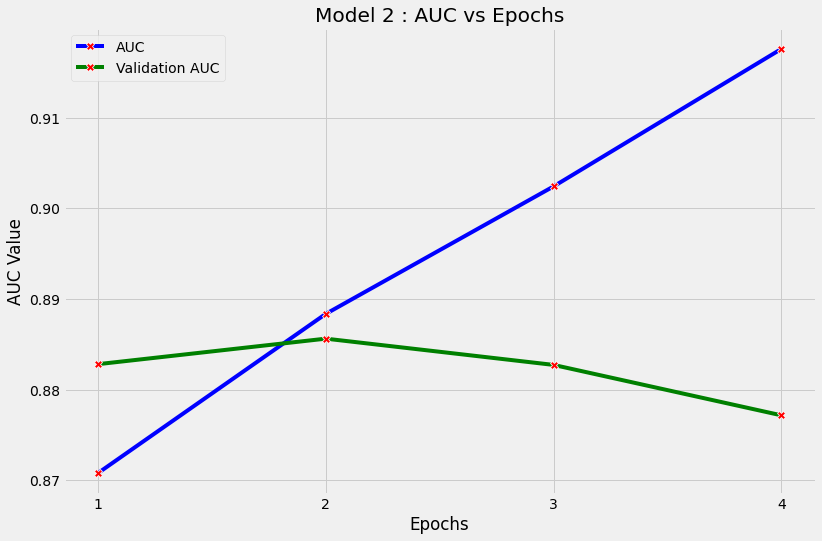

In [60]:
# https://wellsr.com/python/seaborn-line-plot-data-visualization/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html

epochs_ = list(range(1, len(Model2.history['auc']) + 1))
plt.figure(figsize = (12, 8))

sns.lineplot(y = 'auc', data = Model2.history , x = epochs_, label = 'AUC', color = 'b',
             marker = 'X', mfc = 'red', ms = 8)

sns.lineplot(y = 'val_auc', data = Model2.history , x = epochs_, label = 'Validation AUC',
             color = 'g', marker = 'X', mfc = 'red', ms = 8)

plt.title('Model 2 : AUC vs Epochs')
plt.xticks(epochs_) ; plt.xlabel('Epochs') ; plt.ylabel('AUC Value') ; plt.show()

In [61]:
model_2.save('Processed_Data/model_2.h5')

# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In this model you can use the text vectorized data from model1

For other than text data consider the following steps

You have to perform one hot encoding of categorical features. You can use `onehotencoder()` or `countvectorizer()` for the same.

Stack up standardised numerical features and all the one hot encoded categorical features

The input to conv1d layer is 3d, you can convert your 2d data to 3d using `np.newaxis`

Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.

In [62]:
def vectorizer_(ColumnN):
    
    vector = CountVectorizer()
    return vector.fit_transform(x_train[ColumnN]), vector.transform(x_test[ColumnN])

cV_school_state_tr, cV_school_state_te = vectorizer_('school_state')
cV_teacher_prefix_tr, cV_teacher_prefix_te = vectorizer_('teacher_prefix')
cV_proj_gr_cat_tr, cV_proj_gr_cat_te = vectorizer_('project_grade_category')
cV_clean_cat_tr, cV_clean_cat_te = vectorizer_('clean_categories')
cV_clean_subcat_tr, cV_clean_subcat_te = vectorizer_('clean_subcategories')


stack_train = hstack((cV_school_state_tr, cV_teacher_prefix_tr, cV_proj_gr_cat_tr,
                        cV_clean_cat_tr, cV_clean_subcat_tr))

stack_test = hstack((cV_school_state_te, cV_teacher_prefix_te, cV_proj_gr_cat_te,
                        cV_clean_cat_te, cV_clean_subcat_te))

print(f'Shape of train stack (only Cat. variables): {stack_train.shape}')
print(f'Shape of test stack  (only Cat. variables): {stack_test.shape}')

Shape of train stack (only Cat. variables): (76473, 498)
Shape of test stack  (only Cat. variables): (32775, 498)


In [63]:
stack_train = hstack((cV_school_state_tr, cV_teacher_prefix_tr, cV_proj_gr_cat_tr,
                        cV_clean_cat_tr, cV_clean_subcat_tr,
                        np.array(x_train['price']).reshape(-1, 1),
                        np.array(x_train['quantity']).reshape(-1, 1),
                        np.array(x_train['resource_summary_contain_numerical']).reshape(-1, 1)))

stack_test = hstack((cV_school_state_te, cV_teacher_prefix_te, cV_proj_gr_cat_te,
                        cV_clean_cat_te, cV_clean_subcat_te,
                        np.array(x_test['price']).reshape(-1, 1),
                        np.array(x_test['quantity']).reshape(-1, 1),
                        np.array(x_test['resource_summary_contain_numerical']).reshape(-1, 1)))

print(f'Shape of train stack (Cat. + num. variables) : {stack_train.shape}')
print(f'Shape of test stack  (Cat. + num. variables) : {stack_test.shape}')

Shape of train stack (Cat. + num. variables) : (76473, 501)
Shape of test stack  (Cat. + num. variables) : (32775, 501)


In [64]:
stack_train = np.expand_dims(stack_train.todense(), axis=2)
stack_test = np.expand_dims(stack_test.todense(), axis=2)

print('Converting 2D vector space to 3D vector space')
print('-' * 45)
print(f'Shape of train stack (Cat. + num. variables) : {stack_train.shape}')
print(f'Shape of test stack  (Cat. + num. variables) : {stack_test.shape}')

Converting 2D vector space to 3D vector space
---------------------------------------------
Shape of train stack (Cat. + num. variables) : (76473, 501, 1)
Shape of test stack  (Cat. + num. variables) : (32775, 501, 1)


In [65]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

token = Tokenizer()

token.fit_on_texts(x_train['processed_essay'])

essay_train = token.texts_to_sequences(x_train['processed_essay'])
essay_test = token.texts_to_sequences(x_test['processed_essay'])

essay_train_padded = pad_sequences(essay_train, maxlen = 300)
essay_test_padded = pad_sequences(essay_test, maxlen = 300)

word_index = token.word_index

In [66]:
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, 300))
embedding_matrix.shape

(49000, 300)

In [67]:
for word, count in tqdm(word_index.items()):
    
    if glove.get(word) is not None:
        embedding_matrix[count] = glove.get(word)

len(embedding_matrix)

100%|██████████| 48999/48999 [00:00<00:00, 427560.32it/s]


49000

In [68]:
tensorflow.keras.backend.clear_session()
tensorflow.random.set_seed(42)

seq_input = Input(shape = (300,), name = 'Input_Seq_Text_Data')
embed_sqe_input = Embedding(input_dim = num_words, output_dim = 300, weights = [embedding_matrix],
                           trainable = False, name = 'Emb_Text_Data')(seq_input)
lstm_ = LSTM(128, activation = 'relu', return_sequences = True, name = 'LSTM')(embed_sqe_input)
flatten_seq = Flatten(name = 'Flat_LSTM')(lstm_)


non_seq_inp = Input(shape = (stack_train.shape[1], 1), name = 'Otherthan_Text_Data')
x = Conv1D(filters = 64, kernel_size = 2, activation = 'relu', name = 'Conv_1')(non_seq_inp)
x = Conv1D(filters = 32, kernel_size = 2, activation = 'relu', name = 'Conv_2')(x)
# x = Conv1D(filters = 64, kernel_size = 4, activation = 'relu', name = 'Conv_3')(x)
flatten_conv = Flatten(name = 'Flat_NONs')(x)

concat_layer = Concatenate(name = 'Concatenate')([flatten_seq, flatten_conv])

x = Dense(256, activation ='relu', name = 'Dense_layer1_after_concat')(concat_layer)
x = Dropout(0.5, name = 'Dropout1_after_concat')(x)
x = Dense(64, activation ='relu', name = 'Dense_layer2_after_concat')(x)
x = Dropout(0.5, name = 'Dropout2_after_concat')(x)
x = Dense(16, activation ='relu', name = 'Dense_layer3_after_concat')(x)

out_put_l = Dense(2, activation = 'softmax', name = 'output_layer_to_softmax')(x)

model_3 = Model(inputs=[seq_input, non_seq_inp], outputs = out_put_l, name = 'Model_3')

model_3.summary()

Model: "Model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Seq_Text_Data (InputLaye  [(None, 300)]       0           []                               
 r)                                                                                               
                                                                                                  
 Otherthan_Text_Data (InputLaye  [(None, 501, 1)]    0           []                               
 r)                                                                                               
                                                                                                  
 Emb_Text_Data (Embedding)      (None, 300, 300)     14700000    ['Input_Seq_Text_Data[0][0]']    
                                                                                            

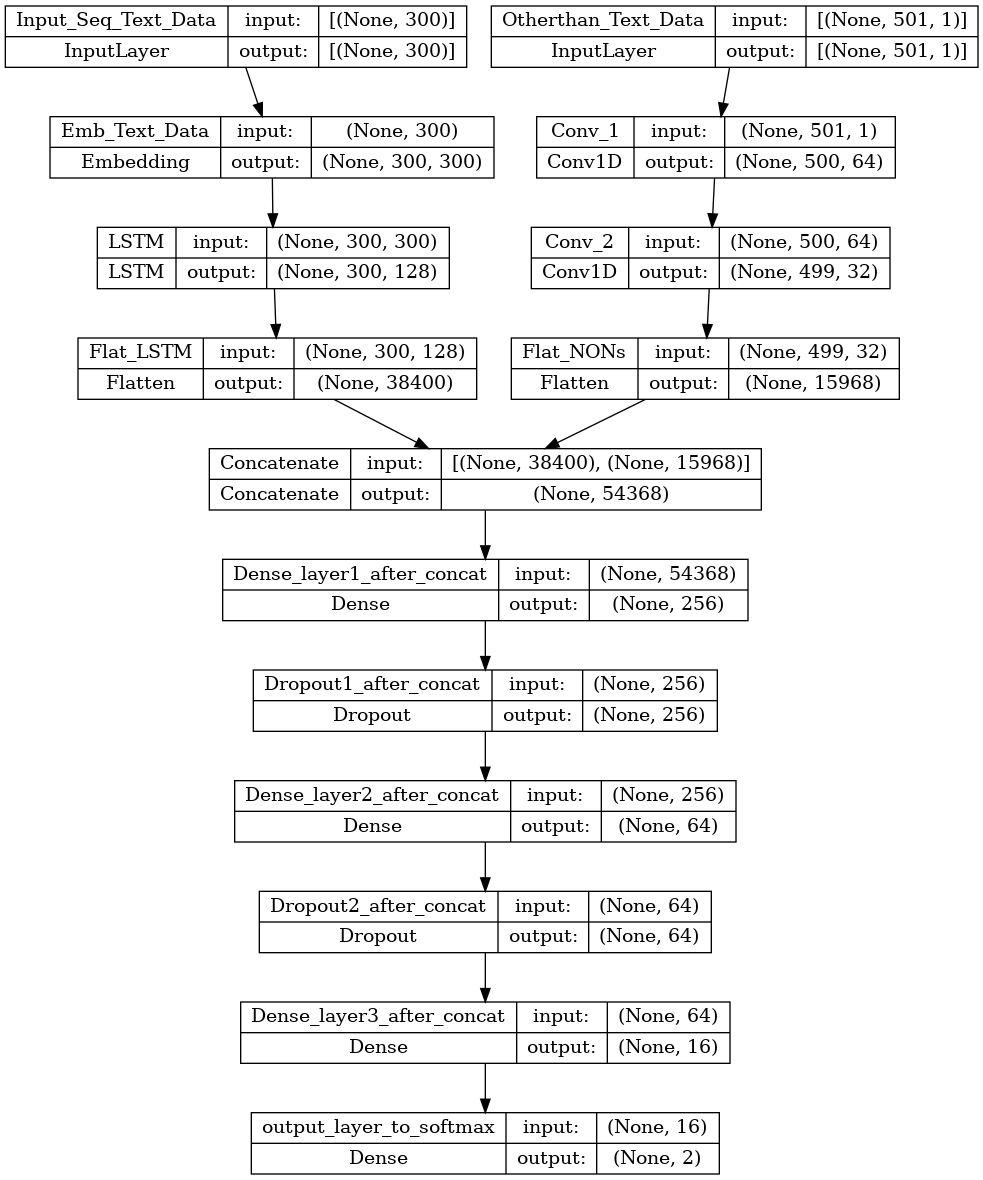

In [69]:
plot_model(model_3, to_file = 'Model_Plots/model_3.png', show_shapes = True)

In [70]:
logdir = 'logs/model_3/' + datetime.now().strftime('%Y%m%d_%H%M%S')
tensorBoard = TensorBoard(log_dir = logdir, histogram_freq = 1)

filepath = 'modelCheck/model_3/epo_{epoch:02d}-accu_{val_auc:.4f}.hdf5'
model_checkP = ModelCheckpoint(filepath, monitor = 'val_auc', verbose = 1, save_best_only = True)

CallBacks = [tensorBoard, model_checkP, reduce_lr, early_stop]

In [71]:
# https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class
# https://keras.io/api/optimizers/adam/
    
optim = Adam(learning_rate = 0.001)
model_3.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = [auc])

In [72]:
EPOCHS_3 = 5

Model3 = model_3.fit([essay_train_padded, stack_train], y_train_cat, epochs = EPOCHS_3,
                        validation_data = ([essay_test_padded, stack_test], y_test_cat),
                        batch_size = 128, verbose = 1, callbacks = CallBacks)

Epoch 1/5
598/598 [==============================] - ETA: 0s - loss: 0.4081 - auc: 0.8960
Epoch 1: val_auc improved from inf to 0.90753, saving model to modelCheck/model_3/epo_01-accu_0.9075.hdf5
598/598 [==============================] - 238s 393ms/step - loss: 0.4081 - auc: 0.8960 - val_loss: 0.3917 - val_auc: 0.9075 - lr: 0.0010
Epoch 2/5
598/598 [==============================] - ETA: 0s - loss: 0.3777 - auc: 0.9118
Epoch 2: val_auc did not improve from 0.90753
598/598 [==============================] - 234s 392ms/step - loss: 0.3777 - auc: 0.9118 - val_loss: 0.3991 - val_auc: 0.9094 - lr: 0.0010
Epoch 3/5
598/598 [==============================] - ETA: 0s - loss: 0.3640 - auc: 0.9187
Epoch 3: val_auc did not improve from 0.90753

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.
598/598 [==============================] - 234s 392ms/step - loss: 0.3640 - auc: 0.9187 - val_loss: 0.3882 - val_auc: 0.9092 - lr: 0.0010
Epoch 4/5
598/598 [======================

In [73]:
model_3_auc = round(Model3.history['auc'][-1], 3)
model_3_val_acc = round(Model3.history['val_auc'][-1], 3)
model_3_loss = round(Model3.history['val_loss'][-1], 3)

print(f"AUC score of the Model-3\t\t: {model_3_auc}")
print(f"Validation accuracy of the Model-3\t: {model_3_val_acc}")
print(f"Validation loss of the Model-3\t\t: {model_3_loss}")

AUC score of the Model-3		: 0.93
Validation accuracy of the Model-3	: 0.907
Validation loss of the Model-3		: 0.391


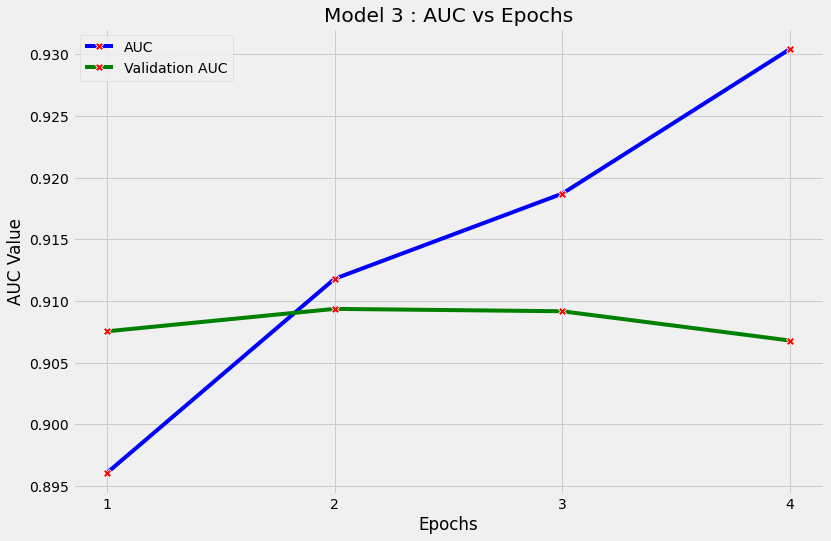

In [74]:
# https://wellsr.com/python/seaborn-line-plot-data-visualization/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html

epochs_ = list(range(1, len(Model3.history['auc']) + 1))
plt.figure(figsize = (12, 8))

sns.lineplot(y = 'auc', data = Model3.history , x = epochs_, label = 'AUC', color = 'b',
             marker = 'X', mfc = 'red', ms = 8)

sns.lineplot(y = 'val_auc', data = Model3.history , x = epochs_, label = 'Validation AUC',
             color = 'g', marker = 'X', mfc = 'red', ms = 8)

plt.title('Model 3 : AUC vs Epochs')
plt.xticks(epochs_) ; plt.xlabel('Epochs') ; plt.ylabel('AUC Value') ; plt.show()

In [75]:
model_3.save('Processed_Data/model_3.h5')

<br>

# Model Comparission Table

<br>

In [76]:
from prettytable import PrettyTable

p_table = PrettyTable()

p_table.field_names = ['Model No', 'Epochs', 'AUC Score', 'Validation AUC Score', 'Val. AUC Loss']
p_table.add_row(['Model 1', 3, model_1_auc, model_1_val_acc, model_1_loss])
p_table.add_row(['Model 2', 4, model_2_auc, model_2_val_acc, model_2_loss])
p_table.add_row(['Model 3', 4, model_3_auc, model_3_val_acc, model_3_loss])

print(p_table)

+----------+--------+-----------+----------------------+---------------+
| Model No | Epochs | AUC Score | Validation AUC Score | Val. AUC Loss |
+----------+--------+-----------+----------------------+---------------+
| Model 1  |   3    |   0.925   |        0.906         |     0.377     |
| Model 2  |   4    |   0.918   |        0.877         |     0.447     |
| Model 3  |   4    |    0.93   |        0.907         |     0.391     |
+----------+--------+-----------+----------------------+---------------+


## <font color = 'red'>Model 1</font><br>
<img src = 'https://i.imgur.com/fpsz6c5.png'>

### <font color = 'blue'>Graph</font><br>
<img src = 'https://i.imgur.com/ggfw9KK.png'>

## <font color = 'red'>Model 2</font><br>
<img src = 'https://i.imgur.com/2IBRoKE.png'>

### <font color = 'blue'>Graph</font><br>
<img src = 'https://i.imgur.com/QL531zF.png'>

## <font color = 'red'>Model 3</font><br>
<img src = 'https://i.imgur.com/GfquM2K.png'>

### <font color = 'blue'>Graph</font><br>
<img src = 'https://i.imgur.com/U7m4LDX.png'>